C:\Users\GE62\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\GE62\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


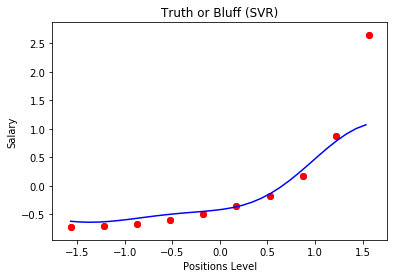

In [17]:
# Point of linear regression is to minimize the error between the prediction and test data
# Point of SVR is to try to not let the error points exceed the threshold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('/Position_Salaries.csv')

x = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2:3].values

# have to feature scale since svm library does not support it
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
# template have both x test and train but here rmb that we did not split our data
# x_test = sc_x.transform(x_test)
y = sc_y.fit_transform(y)

# Fitting SVR to the dataset
from sklearn.svm import SVR
# kernel is rbf refers to Gaussian kernel, it is rbf by default btw
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

# Predict
# need to use scaling to x for predict() because our regressor contains the scaled values
# no need to fit transformm because we dont need to fit it
# ITS A GOOD IDEA TO CHECK ARGUMENTS OF A FUNCTION SUCH AS
# LOOKING FOR THE DATA TYPE TO THE ARGUMENT
# i.e. transform needs an array_like x, which is not a single int or float
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))

# using np.array(6.5) would make a vector with one element but to have a proper matrix,
# for real array like matrix, two brackets covering 6.5 is saying one line and one column(cell)


# # Visualize SVR 
# use x_grid to make line smooth
# if u look at the plot u will see that the trend line does not go to the CEO level point
# this is because svm considers it to be an outlier which is fine because we want to predict 6.5 years
x_grid = np.arange(min(x), max(x),0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x,y, color = 'red')
plt.plot(x_grid,regressor.predict(x_grid), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Positions Level')
plt.ylabel('Salary')
plt.show()

In [14]:
y_pred

array([ 170370.0204065])